In [5]:
dataset_dir = '/home/yogiwisesa/Development/sisrek/ass3/class'

In [6]:
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage.feature import daisy
from skimage import data, exposure
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

In [7]:
def load_dataset():    
    labels = []
    images = []
    for root, dirs, files in os.walk(dataset_dir, topdown=False):
        for name in dirs:
            label = name
            folder = os.path.join(root, name)
            for x in os.listdir(folder):
                labels.append(label)
                images.append(
                    resize(
                        imread(folder + "/" + x), (50,50)
                    )
                )
#                 print(folder + "/" + x)
    return images, labels 

In [8]:
x_data, y_data = load_dataset()

/home/yogiwisesa/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/yogiwisesa/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


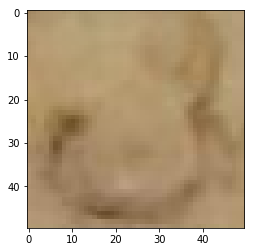

PI


In [9]:
plt.imshow(x_data[1])
plt.show()
print(y_data[1])

In [10]:
def hog_extract(images):
    list_images = []
    for image in images:
        fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=False)
        list_images.append(fd)
    return list_images

In [11]:
def daisy_extract(images):
    list_images = []
    for image in images:
        desc, image = daisy(image, visualize=True)
        list_images.append(desc)
    return list_images

In [12]:
def to_grayscale(images):
    list_images = []
    for image in images:
        list_images.append(rgb2gray(image))
    return list_images

In [13]:
x_data_gray = to_grayscale(x_data)

In [149]:
x_data_hog = hog_extract(x_data_gray)

/home/yogiwisesa/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [152]:
x_data_concate = np.concatenate((x_data_hog))

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x_data_hog, y_data, test_size=0.33, random_state=42)

In [160]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [163]:
y_predict = clf.predict(x_test)

In [164]:
print(accuracy_score(y_test, y_predict)*100,'%')

63.49288486416559 %


### Daisy

In [ ]:
x_data_daisy = daisy_extract(x_data_gray)

In [ ]:
x_data_concate_daisy = np.concatenate((x_data_hog))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data_hog, y_data, test_size=0.33, random_state=42)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train) 